# Rotary Spectra of Areas

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import netcdf
from scipy import signal

In [2]:
fpath = '/gscratch/jisao/mclaret/GL64/'
gridU_k1 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridU_k1.nc','r')
gridV_k1 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridV_k1.nc','r')
gridU_k58 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridU_k58.nc','r')
gridV_k58 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridV_k58.nc','r')

In [3]:
print('Bottom left corner:', gridU_k1.variables['nav_lon'][0,0].copy(), gridU_k1.variables['nav_lat'][0,0].copy())
print('Top left corner:', gridU_k1.variables['nav_lon'][-1, 0].copy(), gridU_k1.variables['nav_lat'][-1,0].copy())
print('Top right corner:', gridU_k1.variables['nav_lon'][-1, -1].copy(), gridU_k1.variables['nav_lat'][-1, -1].copy())
print('Bottom right corner:', gridU_k1.variables['nav_lon'][0,-1].copy(), gridU_k1.variables['nav_lat'][0,-1].copy())
print('nav_lon shape:', gridU_k1.variables['nav_lon'].shape)
print('nav_lat shape:', gridU_k1.variables['nav_lat'].shape)
print('k1 times shape:', gridU_k1.variables['vozocrtx'].shape)
print('k58 times shape:', gridU_k58.variables['vozocrtx'].shape)

Bottom left corner: 2.1015625 41.2624
Top left corner: 2.1015625 43.902092
Top right corner: 7.9765625 43.902092
Bottom right corner: 7.9765625 41.2624
nav_lon shape: (170, 377)
nav_lat shape: (170, 377)
k1 times shape: (3648, 1, 170, 377)
k58 times shape: (3648, 1, 170, 377)


In [4]:
"""find indices of (5.5, 42.5) and (6.5, 43)"""
target_lon = [5.5, 6.5]
target_lat = [42.5, 43]

# find indices of target longitudes
for lon in target_lon:
    nav_lon = 2.
    i_lon = 0
    while (nav_lon < lon):
        nav_lon = gridU_k1.variables['nav_lon'][0,i_lon].copy()
        i_lon += 1
    print(nav_lon, 'at index', i_lon)
    print(gridU_k1.variables['nav_lon'][0,i_lon-1].copy(), 'at index', i_lon-1)
    print(gridU_k1.variables['nav_lon'][0,i_lon-2].copy(), 'at index', i_lon-2)
    print()

# find indices of target latitudes
for lat in target_lat:
    nav_lat = 41.
    i_lat = 0
    while (nav_lat < lat):
        nav_lat = gridU_k1.variables['nav_lat'][i_lat,0].copy()
        i_lat += 1
    print(nav_lat, 'at index', i_lat)
    print(gridU_k1.variables['nav_lat'][0,i_lat-1].copy(), 'at index', i_lat-1)
    print(gridU_k1.variables['nav_lat'][0,i_lat-2].copy(), 'at index', i_lat-2)
    print()

5.5078125 at index 219
5.5078125 at index 218
5.4921875 at index 217

6.5078125 at index 283
6.5078125 at index 282
6.4921875 at index 281

42.512302 at index 81
41.2624 at index 80
41.2624 at index 79

43.01213 at index 113
41.2624 at index 112
41.2624 at index 111



In [5]:
# variables at k=1, t=0
nav_lon = gridU_k1.variables['nav_lon'][:, :].copy()         # longitude
nav_lat = gridU_k1.variables['nav_lat'][:, :].copy()         # latitude
U_k1_t0 = gridU_k1.variables['vozocrtx'][0, 0, :, :].copy()  # zonal velocities at time zero

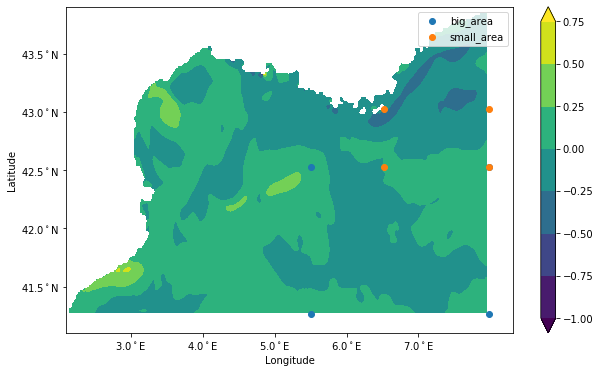

In [6]:
"""Verify coordinate indices"""
# prepare a figure of zonal velocities
plt.figure(1, figsize=(10,6))

# mask land with white (value = 0.0)
U_k1_t0 = np.ma.masked_where(U_k1_t0 == 0.0, U_k1_t0)
cmap = plt.cm.OrRd
cmap.set_bad(color='w')

# plot temperatures
plt.contourf(nav_lon, nav_lat, U_k1_t0, extend='both')
plt.colorbar()

# format lat/long labels
locs, labels = plt.xticks()
Elabels = [str(loc) + '$^\circ$E' for loc in locs]
plt.xticks(locs[1:-1], Elabels[1:-1])
locs, labels = plt.yticks()
Nlabels = [str(loc) + '$^\circ$N' for loc in locs]
plt.yticks(locs[1:-1], Nlabels[1:-1])

# plot coordinates on map
xs = [gridU_k1.variables['nav_lon'][0,218].copy(),
      gridU_k1.variables['nav_lon'][0,218].copy(),
      gridU_k1.variables['nav_lon'][0,-1].copy(),
      gridU_k1.variables['nav_lon'][0,-1].copy()]
ys = [gridU_k1.variables['nav_lat'][0,0].copy(),
      gridU_k1.variables['nav_lat'][81,0].copy(),
      gridU_k1.variables['nav_lat'][81,0].copy(),
      gridU_k1.variables['nav_lat'][0,0].copy()]
plt.scatter(xs, ys, label='big_area')

xs = [gridU_k1.variables['nav_lon'][0,283].copy(),
      gridU_k1.variables['nav_lon'][0,283].copy(),
      gridU_k1.variables['nav_lon'][0,-1].copy(),
      gridU_k1.variables['nav_lon'][0,-1].copy()]
ys = [gridU_k1.variables['nav_lat'][81,0].copy(),
      gridU_k1.variables['nav_lat'][113,0].copy(),
      gridU_k1.variables['nav_lat'][113,0].copy(),
      gridU_k1.variables['nav_lat'][81,0].copy()]
plt.scatter(xs, ys, label='small_area')

# figure labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [7]:
# surface parameters
omega = 7.2921e-5
maxt = len(gridU_k1.variables['vozocrtx'][:, 0, 0, 0].copy())
dt = 1.0  # 1-hour resolution
T = (maxt-1)*dt
times = np.arange(1,maxt+1,1) * 1.0
print('maxt = ', maxt)
print('times = ', times)

maxt =  3648
times =  [1.000e+00 2.000e+00 3.000e+00 ... 3.646e+03 3.647e+03 3.648e+03]


In [8]:
fCor_big = 2.*omega*np.sin((gridU_k1.variables['nav_lat'][40,0].copy())/180*np.pi)  # f at center of big area; radians/sec
Tip_big = ((1./fCor_big) / 3600) * (2*np.pi)  # hours/cycle
print('fCor =', fCor_big)
print('Tip =', Tip_big)

# find average amplitudes of surface Fourier coefficients
amp_k1_big = [0. for time in times]
N = 0
for lon in range(218, 377):
    for lat in range(0, 81+1):
        U = gridU_k1.variables['vozocrtx'][:, 0, lat, lon].copy()  # zonal velocities
        V = gridV_k1.variables['vomecrty'][:, 0, lat, lon].copy()  # meridional velocities
        
        win = signal.tukey(len(U), 0.2)  # Tukey window (20%)
        
        hvel = U + 1j*V              # combine U and V
        fc = np.fft.fft(hvel*win)    # k1 Fourier coefficients (FCs) w/ window
        amp_k1_big += np.abs(fc)**2  # amplitude of k1 FCs
        N += 1
print('N =', N)
amp_k1_big /= N
print(amp_k1_big)

fq_k1 = np.fft.fftfreq(times.shape[-1],dt)  # frequencies corresponding to each FC (cycles/h)
fq_k1_norm_big = fq_k1*2*np.pi/fCor_big/3600   # normalized to coriolis frequency

# rearrange data for plotting
amp_k1_big = np.fft.fftshift(amp_k1_big)
fq_k1_norm_big = np.fft.fftshift(fq_k1_norm_big)

fCor = 9.737414270331705e-05
Tip = 17.923949865336013
N = 13038
[29926.14885828 11680.38306655  7184.3885773  ...  3152.13041142
  6837.31359547 10540.67153233]


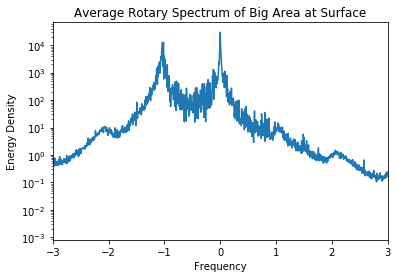

In [9]:
# plot rotary spectrum of big area at k1
plt.figure()
plt.plot(fq_k1_norm_big, amp_k1_big)
plt.xlim(-3,3)
#plt.ylim(10**0)

# plot labels
plt.title('Average Rotary Spectrum of Big Area at Surface')
plt.xlabel('Frequency')
plt.ylabel('Energy Density')
plt.yscale('log')
plt.show()

In [10]:
fCor_small = 2.*omega*np.sin((gridU_k1.variables['nav_lat'][97,0].copy())/180*np.pi)  # f at center of small area; radians/sec
Tip_small = ((1./fCor_small) / 3600) * (2*np.pi)  # hours/cycle
print('fCor =', fCor_small)
print('Tip =', Tip_small)

# find average amplitudes of surface Fourier coefficients
amp_k1_small = [0. for time in times]
N = 0
for lon in range(283, 377):
    for lat in range(81, 113+1):
        U = gridU_k1.variables['vozocrtx'][:, 0, lat, lon].copy()  # zonal velocities
        V = gridV_k1.variables['vomecrty'][:, 0, lat, lon].copy()  # meridional velocities
        
        win = signal.tukey(len(U), 0.2)  # Tukey window (20%)
        
        hvel = U + 1j*V                # combine U and V
        fc = np.fft.fft(hvel*win)      # k1 Fourier coefficients (FCs) w/ window
        amp_k1_small += np.abs(fc)**2  # amplitude of k1 FCs
        N += 1
print('N =', N)
amp_k1_small /= N
print(amp_k1_small)

fq_k1 = np.fft.fftfreq(times.shape[-1],dt)     # frequencies corresponding to each FC (cycles/h)
fq_k1_norm_small = fq_k1*2*np.pi/fCor_small/3600  # normalized to coriolis frequency

# rearrange data for plotting
amp_k1_small = np.fft.fftshift(amp_k1_small)
fq_k1_norm_small = np.fft.fftshift(fq_k1_norm_small)

fCor = 9.904970484389346e-05
Tip = 17.620741573587143
N = 3102
[148530.46374369  18320.84428283   6027.74907768 ...   5048.86329713
   4054.42812744  11189.51771575]


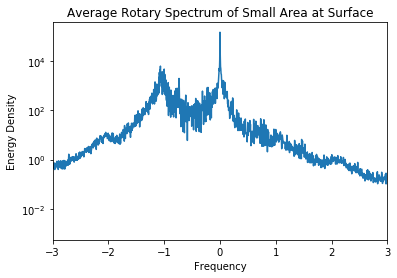

In [11]:
# plot rotary spectrum of small area at k1
plt.figure()
plt.plot(fq_k1_norm_small, amp_k1_small)
plt.xlim(-3,3)
#plt.ylim(10**0)

# plot labels
plt.title('Average Rotary Spectrum of Small Area at Surface')
plt.xlabel('Frequency')
plt.ylabel('Energy Density')
plt.yscale('log')
plt.show()

In [12]:
# find average amplitudes of surface Fourier coefficients
amp_k58_big = [0. for time in times]
N = 0
for lon in range(218, 377):
    for lat in range(0, 81+1):
        U = gridU_k58.variables['vozocrtx'][:, 0, lat, lon].copy()  # zonal velocities
        V = gridV_k58.variables['vomecrty'][:, 0, lat, lon].copy()  # meridional velocities
        
        win = signal.tukey(len(U), 0.2)  # Tukey window (20%)
        
        hvel = U + 1j*V              # combine U and V
        fc = np.fft.fft(hvel*win)    # k1 Fourier coefficients (FCs) w/ window
        amp_k58_big += np.abs(fc)**2  # amplitude of k1 FCs
        N += 1
print('N =', N)
amp_k58_big /= N
print(amp_k58_big)

fq_k58 = np.fft.fftfreq(times.shape[-1],dt)  # frequencies corresponding to each FC (cycles/h)
fq_k58_norm_big = fq_k58*2*np.pi/fCor_big/3600   # normalized to coriolis frequency

# rearrange data for plotting
amp_k58_big = np.fft.fftshift(amp_k58_big)
fq_k58_norm_big = np.fft.fftshift(fq_k58_norm_big)

N = 13038
[8892.93614217 2948.16779153 2095.46881414 ... 1638.92726709 2089.90165938
 3329.60941701]


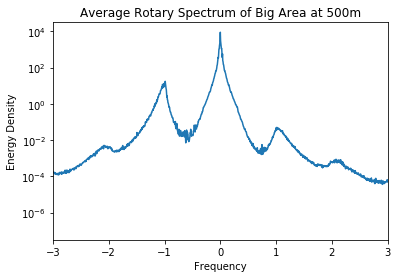

In [13]:
# plot rotary spectrum of big area at k58
plt.figure()
plt.plot(fq_k58_norm_big, amp_k58_big)
plt.xlim(-3,3)
#plt.ylim(10**0)

# plot labels
plt.title('Average Rotary Spectrum of Big Area at 500m')
plt.xlabel('Frequency')
plt.ylabel('Energy Density')
plt.yscale('log')
plt.show()

In [14]:
# find average amplitudes of 500m Fourier coefficients
amp_k58_small = [0. for time in times]
N = 0
for lon in range(283, 377):
    for lat in range(81, 113+1):
        U = gridU_k58.variables['vozocrtx'][:, 0, lat, lon].copy()  # zonal velocities
        V = gridV_k58.variables['vomecrty'][:, 0, lat, lon].copy()  # meridional velocities
        
        win = signal.tukey(len(U), 0.2)  # Tukey window (20%)
        
        hvel = U + 1j*V                # combine U and V
        fc = np.fft.fft(hvel*win)      # k1 Fourier coefficients (FCs) w/ window
        amp_k58_small += np.abs(fc)**2  # amplitude of k1 FCs
        N += 1
print('N =', N)
amp_k58_small /= N
print(amp_k58_small)

fq_k58 = np.fft.fftfreq(times.shape[-1],dt)     # frequencies corresponding to each FC (cycles/h)
fq_k58_norm_small = fq_k58*2*np.pi/fCor_small/3600  # normalized to coriolis frequency

# rearrange data for plotting
amp_k58_small = np.fft.fftshift(amp_k58_small)
fq_k58_norm_small = np.fft.fftshift(fq_k58_norm_small)

N = 3102
[9971.56134073 1214.06706215 1376.29747409 ... 1321.35593515 1683.62777
 1112.68125863]


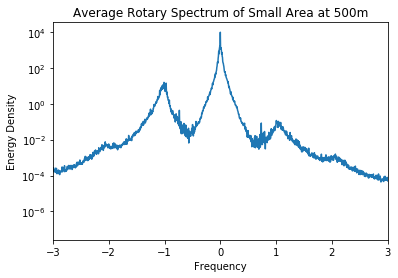

In [15]:
# plot rotary spectrum of small area at k1
plt.figure()
plt.plot(fq_k58_norm_small, amp_k58_small)
plt.xlim(-3,3)
#plt.ylim(10**0)

# plot labels
plt.title('Average Rotary Spectrum of Small Area at 500m')
plt.xlabel('Frequency')
plt.ylabel('Energy Density')
plt.yscale('log')
plt.show()

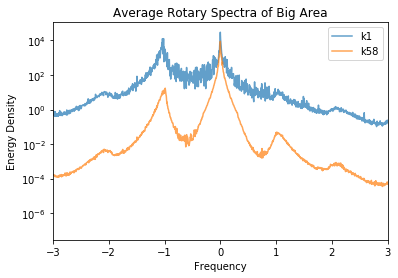

In [16]:
# plot rotary spectra of big area
plt.figure()
plt.plot(fq_k1_norm_big, amp_k1_big, label='k1', alpha=0.7)
plt.plot(fq_k58_norm_big, amp_k58_big, label='k58', alpha=0.7)
plt.xlim(-3,3)
#plt.ylim(10**0)

# plot labels
plt.title('Average Rotary Spectra of Big Area')
plt.xlabel('Frequency')
plt.ylabel('Energy Density')
plt.yscale('log')
plt.legend()
plt.show()

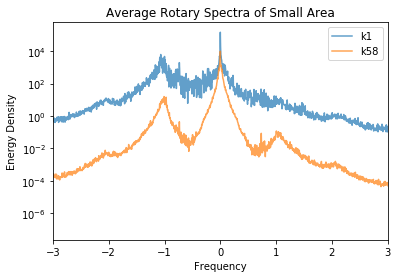

In [17]:
# plot rotary spectra of big area
plt.figure()
plt.plot(fq_k1_norm_small, amp_k1_small, label='k1', alpha=0.7)
plt.plot(fq_k58_norm_small, amp_k58_small, label='k58', alpha=0.7)
plt.xlim(-3,3)
#plt.ylim(10**0)

# plot labels
plt.title('Average Rotary Spectra of Small Area')
plt.xlabel('Frequency')
plt.ylabel('Energy Density')
plt.yscale('log')
plt.legend()
plt.show()